In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df_questions = pd.read_csv('../data/question_data.csv', sep=';', index_col=0)

In [3]:
display(df_questions.head())

,text,option_1,option_2,option_3,option_4,N,Type,Order,Keywords
q2,Breast implants?,more cool than pathetic,more pathetic than cool,NaN,NaN,24839,N,NaN,sex/intimacy; preference; opinion
q11,How does the idea of being slapped hard in the...,Horrified,Aroused,Nostalgic,Indifferent,28860,N,NaN,sex/intimacy
q12,Divide your age by 2. Have you had sex with a...,Yes,No,NaN,NaN,22496,O,NaN,sex/intimacy
q13,Is a girl who's slept with 100 guys a bad person?,Yes,No,NaN,NaN,32581,O,NaN,sex/intimacy
q14,Is a guy who's slept with 100 girls a bad person?,Yes,No,NaN,NaN,31127,O,NaN,sex/intimacy


In [4]:
# Get all unique values in the 'Keywords' column
all_keywords = df_questions['Keywords'].str.split(';').explode().unique()

all_keywords = set([k.replace(' ', '') for k in all_keywords if k is not np.nan])
# Display the unique keywords
print(all_keywords)

{'descriptive', 'cognitive', 'BDSM', 'technology', 'politics', 'religion/superstition', 'preference', 'sex/intimacy', 'opinion'}


In [5]:
for index, row in df_questions.iterrows():
    keywords = row['Keywords']
    if keywords is np.nan:
        continue
    for k in all_keywords:
        if k in keywords:
            df_questions.at[index, k] = 1
            continue

In [6]:
df_questions[list(all_keywords)] = df_questions[list(all_keywords)].fillna(0)
display(df_questions.head())

,text,option_1,option_2,option_3,option_4,N,Type,Order,Keywords,preference,sex/intimacy,opinion,BDSM,religion/superstition,descriptive,politics,cognitive,technology
q2,Breast implants?,more cool than pathetic,more pathetic than cool,NaN,NaN,24839,N,NaN,sex/intimacy; preference; opinion,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
q11,How does the idea of being slapped hard in the...,Horrified,Aroused,Nostalgic,Indifferent,28860,N,NaN,sex/intimacy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q12,Divide your age by 2. Have you had sex with a...,Yes,No,NaN,NaN,22496,O,NaN,sex/intimacy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q13,Is a girl who's slept with 100 guys a bad person?,Yes,No,NaN,NaN,32581,O,NaN,sex/intimacy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
q14,Is a guy who's slept with 100 girls a bad person?,Yes,No,NaN,NaN,31127,O,NaN,sex/intimacy,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


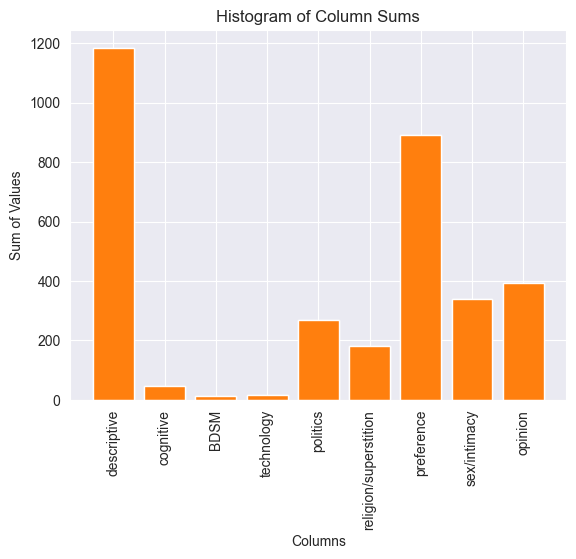

In [7]:
sums = df_questions[list(all_keywords)].sum()

labels = [col.replace("_", "\n") for col in sums.index]

plt.bar(labels, sums.values)

plt.xticks(rotation=90, ha='center', multialignment='center')
# Plot histogram
plt.bar(sums.index, sums.values)
plt.xlabel('Columns')
plt.ylabel('Sum of Values')
plt.title('Histogram of Column Sums')
plt.show()

In [8]:
descriptive_cols = df_questions[df_questions['descriptive']==1]

In [9]:
import pickle
import os

for k in all_keywords:
    k_list = df_questions[df_questions[k]==1].index.tolist()
    file_path = os.path.join("..", "outputs", f'{k}_cols_index.pkl'.replace("/", "_").replace("\\", "_"))

    # Save the list as a .pkl file
    with open(file_path, 'wb') as f:
        pickle.dump(k_list, f)
